In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Dropout,BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# !pip install tensorflow

In [3]:
# Step 1: Load California Housing Data
data = fetch_california_housing()

In [4]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [38]:
# X = data.data
# y = data.target

In [9]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target,name= "Price")

In [11]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [13]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [15]:
print("Input shape:", X.shape)   # (20640, 8) - # 8 is number of independent columns
print("Target shape:", y.shape)  # (20640,)

Input shape: (20640, 8)
Target shape: (20640,)


In [17]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [19]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape[1]

8

In [23]:
# Step 3: Feature Scaling
# scaler = StandardScaler()

# Step 3: Normalize input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Step 4: Build a regression model
model = Sequential([
    layers.Dense(128, activation='relu', input_shape= [X_train.shape[1]]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),    
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1,activation = "linear")  # Regression output
])


C:\Users\Pavithira\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,833 (65.75 KB)

 Trainable params: 16,257 (63.50 KB)

 Non-trainable params: 576 (2.25 KB)

In [48]:
import tensorflow as tf

def r2_score(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))  
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

In [56]:
# Step 5: Compile the model
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=[r2_score])

In [94]:
# Step 6: Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train,
                    epochs=50, batch_size=32, 
                    validation_split=0.1,callbacks=[early_stop],
    verbose=2)

Epoch 1/50
465/465 - 2s - 5ms/step - loss: 0.5329 - r2_score: 0.5667 - val_loss: 0.5780 - val_r2_score: 0.5560
Epoch 2/50
465/465 - 3s - 6ms/step - loss: 0.5397 - r2_score: 0.5630 - val_loss: 0.6676 - val_r2_score: 0.4754
Epoch 3/50
465/465 - 2s - 5ms/step - loss: 0.5299 - r2_score: 0.5726 - val_loss: 0.5938 - val_r2_score: 0.5376
Epoch 4/50
465/465 - 4s - 8ms/step - loss: 0.5235 - r2_score: 0.5824 - val_loss: 0.5847 - val_r2_score: 0.5459
Epoch 5/50
465/465 - 4s - 8ms/step - loss: 0.5314 - r2_score: 0.5726 - val_loss: 0.6053 - val_r2_score: 0.5334
Epoch 6/50
465/465 - 3s - 7ms/step - loss: 0.5247 - r2_score: 0.5729 - val_loss: 0.6510 - val_r2_score: 0.4893
Epoch 7/50
465/465 - 4s - 9ms/step - loss: 0.5331 - r2_score: 0.5667 - val_loss: 0.6354 - val_r2_score: 0.5159
Epoch 8/50
465/465 - 3s - 7ms/step - loss: 0.5290 - r2_score: 0.5708 - val_loss: 0.5852 - val_r2_score: 0.5478
Epoch 9/50
465/465 - 4s - 9ms/step - loss: 0.5270 - r2_score: 0.5694 - val_loss: 0.5734 - val_r2_score: 0.5579
E

In [64]:
# Step 7: Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test,verbose=1)
print(f"Test MAE: {mae:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5683 - r2_score: 0.5491
Test MAE: 0.54


In [65]:
# Step 8: Predict on test data
y_pred = model.predict(X_test_scaled).flatten()`

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [96]:
y_pred

array([1.2624053, 2.070163 , 2.8519015, ..., 4.4885273, 1.3717473,
       2.143391 ], dtype=float32)

In [98]:
y_test[0]

4.526

In [100]:
y_test_array = y_test.values

In [102]:
# Step 9: Compare predictions with actual values
for i in range(5):
    print(f"Predicted: {y_pred[i]:.2f}, Actual: {y_test_array[i]:.2f}")

Predicted: 1.26, Actual: 0.48
Predicted: 2.07, Actual: 0.46
Predicted: 2.85, Actual: 5.00
Predicted: 2.72, Actual: 2.19
Predicted: 2.69, Actual: 2.78


In [104]:
# Step 10: Optional - Plot training history
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.title('Model Loss over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Loss (MSE)')
# plt.legend()
# plt.show()

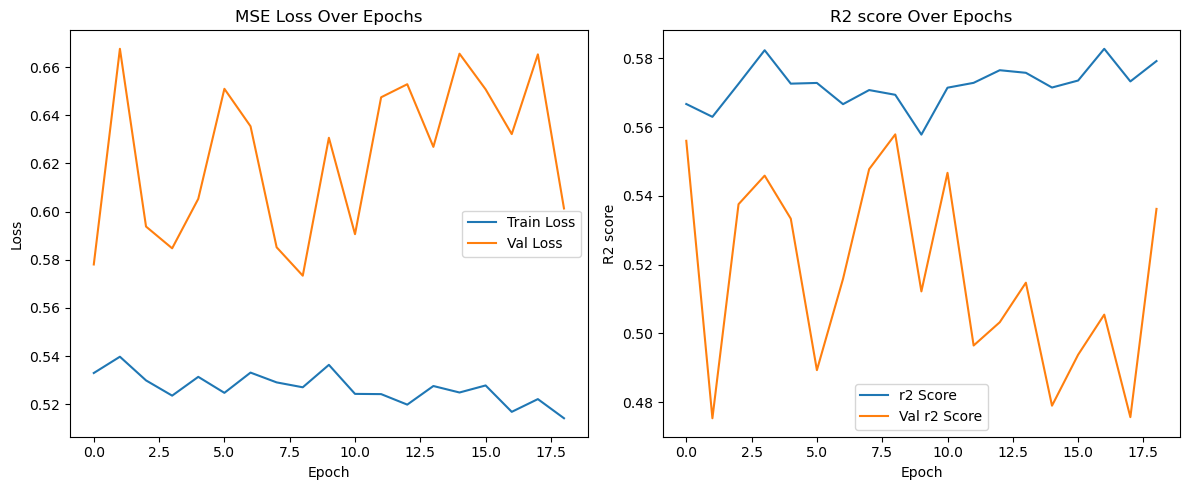

In [106]:
# Plot Training History
def plot_history(hist):
    plt.figure(figsize=(12, 5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Val Loss')
    plt.title('MSE Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # MAE
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['r2_score'], label='r2 Score')
    plt.plot(hist.history['val_r2_score'], label='Val r2 Score')
    plt.title('R2 score Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('R2 score')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


In [107]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='best')
# plt.show()

KeyError: 'accuracy'

In [109]:
# Model Summary
print("\n🧱 Model Architecture:")
model.summary()


🧱 Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,349 (192.77 KB)

 Trainable params: 16,257 (63.50 KB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 32,516 (127.02 KB)

In [111]:
import numpy as np

y = np.array([[100], [200], [300],[400]])
print(y.shape)  # (3, 1)

(4, 1)


In [113]:
y

array([[100],
       [200],
       [300],
       [400]])

In [115]:
y = y.reshape(-1) # flatten an array into a 1D array

In [117]:
y

array([100, 200, 300, 400])

In [119]:
print(y.shape) 

(4,)
